In [32]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [47]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

run=20 #1/4 degree NeverWorld setup
fs1=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os1=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing1=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
sn1     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av1     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average

run=26 #1/8 degree NeverWorld setup
fs2=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os2=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing2=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
sn2     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av2     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average



%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [48]:
#Print the average file information: av1
#Print the static file information: #fs1
#Print ocean stats file: #os1
#Print forcing file: #forcing1

In [49]:
#Read in various grid variables from the static file and forcing:

xh1 = fs1.xh.values
yh1 = fs1.yh.values
xh2 = fs2.xh.values
yh2 = fs2.yh.values




### Plotting density, $d\rho /dz$ as 500-day averaged quantities (averaging over all 100 snapshots from the averages file) as a function of average layer depth at given latitudes.

In [100]:
#Quarter degree
index=80 #80, 100, 220, 280, 460 for 1/4 degree
Layer1 = np.array(os1['Layer']);
Layermat1=np.tile(Layer1,[len(xh1),1]); Layermat1=np.moveaxis(Layermat1, [0, 1], [1, 0])
Interface1 = np.array(os1['Interface']); drho1=np.diff(Interface1)
drhomat1=np.tile(drho1,[len(xh1),1]);     drhomat1 =np.moveaxis(drhomat1, [0, 1], [1,0])

h1 = np.nanmean(np.array(av1['h'][:,:,index,:]),axis=0);
eta1 = np.zeros((len(Layer1)+1,len(xh1)));

for i in range(1,len(Layer1)+1):
    eta1[i,:]=np.nansum(h1[0:i,:],axis=0)
#To make sure eta is correct: #print(eta[:,50,50]) #print(h[:,50,50])  
drhodz1=drhomat1/h1

Quarter_Density_z = np.nanmean(Layermat1,axis=1);
Quarter_drhodz_z = np.nanmean(drhodz1,axis=1);
Quarter_Position_z= (-eta1[1:,:]-eta1[:-1,:])/2.; 
Quarter_Position_z=np.nanmean(Quarter_Position_z,axis=1)



In [101]:
#Eighth degree
index=160 #160, 200, 440, 560, 920 for 1/8 degree
Layer2 = np.array(os2['Layer']);
Layermat2=np.tile(Layer2,[len(xh2),1]); Layermat2=np.moveaxis(Layermat2, [0, 1], [1, 0])
Interface2 = np.array(os2['Interface']); drho2=np.diff(Interface2)
drhomat2=np.tile(drho2,[len(xh2),1]);     drhomat2 =np.moveaxis(drhomat2, [0, 1], [1,0])

h2 = np.nanmean(np.array(av2['h'][:,:,index,:]),axis=0); 
eta2 = np.zeros((len(Layer2)+1,len(xh2)));

for i in range(1,len(Layer2)+1):
    eta2[i,:]=np.nansum(h2[0:i,:],axis=0)
#To make sure eta is correct: #print(eta[:,50,50]) #print(h[:,50,50])  
drhodz2=drhomat2/h2
Eighth_Density_z = np.nanmean(Layermat2,axis=1);
Eighth_drhodz_z = np.nanmean(drhodz2,axis=1);
Eighth_Position_z= (-eta2[1:,:]-eta2[:-1,:])/2.; 
Eighth_Position_z=np.nanmean(Eighth_Position_z,axis=1)




In [96]:
len(xh2)

480

Text(0.5, 1.0, 'Latitude = 45$^\\circ$ North')

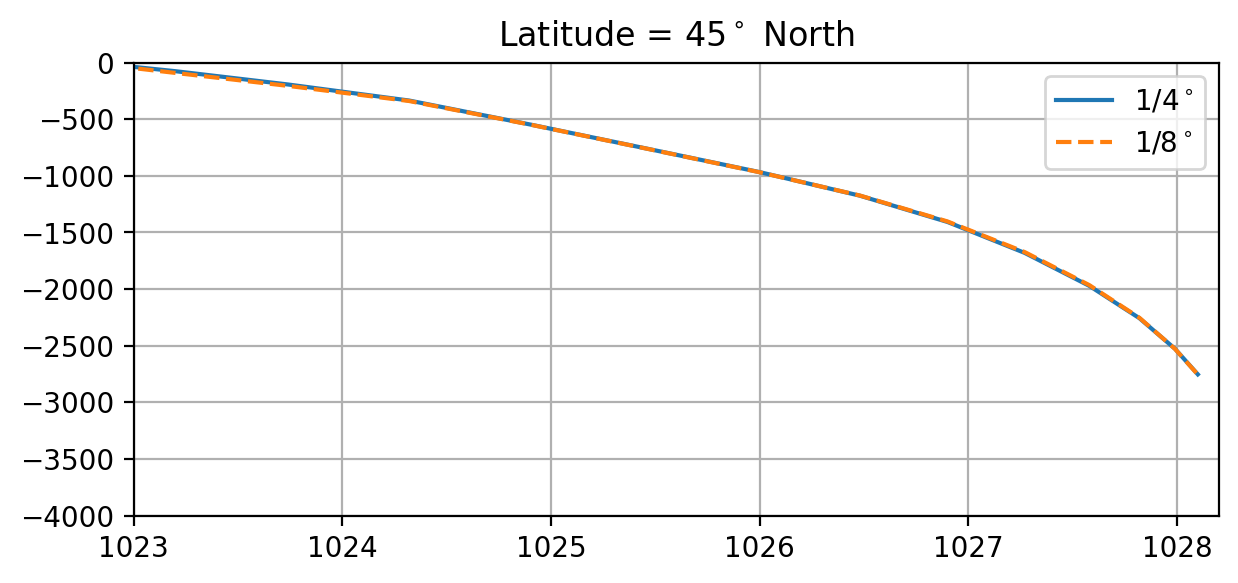

In [98]:
fig=plt.figure(figsize=(7,3), dpi=200, facecolor='w', edgecolor='k')

plt.plot(Quarter_Density_z,Quarter_Position_z)
plt.plot(Eighth_Density_z,Eighth_Position_z,'--')
plt.legend(['1/4$^\circ$','1/8$^\circ$'])
plt.grid('on')
plt.xlim([1023,1028.2])
plt.ylim([-4000,0])
plt.title('Latitude = 45$^\circ$ North')



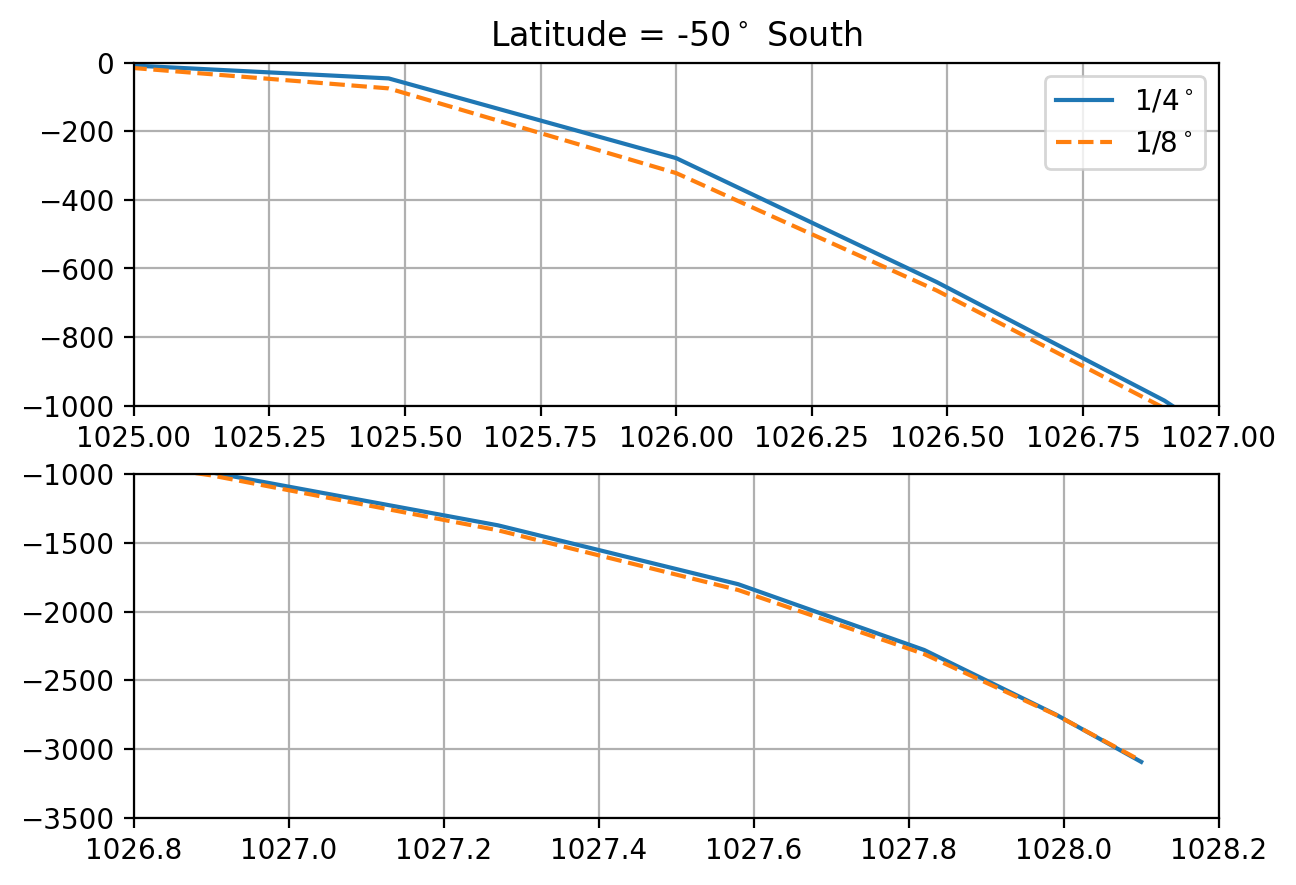

In [103]:
fig=plt.figure(figsize=(7,5), dpi=200, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
plt.plot(Quarter_Density_z,Quarter_Position_z)
plt.plot(Eighth_Density_z,Eighth_Position_z,'--')
plt.legend(['1/4$^\circ$','1/8$^\circ$'])
plt.grid('on')
plt.xlim([1025,1027])
plt.ylim([-1000,0])
plt.title('Latitude = -50$^\circ$ South')

plt.subplot(2,1,2)
plt.xlim([1026.8,1028.2])
plt.ylim([-3500,-1000])
plt.plot(Quarter_Density_z,Quarter_Position_z)
plt.plot(Eighth_Density_z,Eighth_Position_z,'--')
plt.grid('on')

